In [8]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

# Discrete Random Variable and Probability Mass Distributions

# 1. Binomial Distributions

- https://docs.scipy.org/doc/scipy/reference/stats.html

In [9]:
from scipy.stats import binom # binomial distribution from scipy

- Parameters

In [10]:
n = 100 # 100 numbers of trials
p = 0.5 # a fair coin : probability for success (head) is equal to probability for failture (tail).

## Calculating Descriptive Statistics

1. m = mean
2. v = variance
3. s = skewness
4. k = kurtosis

In [11]:
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

In [12]:
print(mean, var, skew, kurt)

50.0 25.0 0.0 -0.02


## Visualizing Binomial Distributions

- specifying the x range to plot: x = the number of successes among n trials

In [18]:
x = np.arange(0, 100, 1)

In [19]:
rv = binom(n, p) # random variable satisfying binomial distributions

- y is the probability to have x successes among n trials

In [20]:
y = rv.pmf(x) # pmf = Probability Mass Function

In [22]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

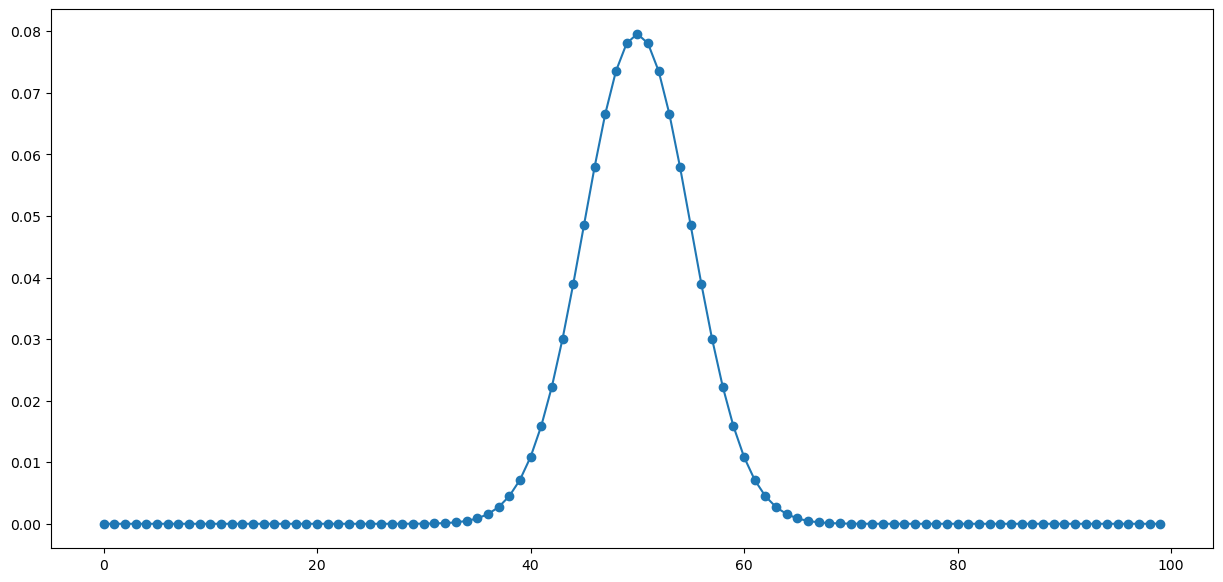

In [25]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.plot(x, y, marker='o')
plt.show()

- Let us change n and p, for example, unfair coin.

In [45]:
n = 50
p = 0.9

In [46]:
mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

In [47]:
print(mean, var, skew, kurt)

45.0 4.499999999999999 -0.3771236166328254 0.10222222222222226


In [48]:
x = np.arange(0, 51, 1)
rv = binom(n, p)
y = rv.pmf(x)

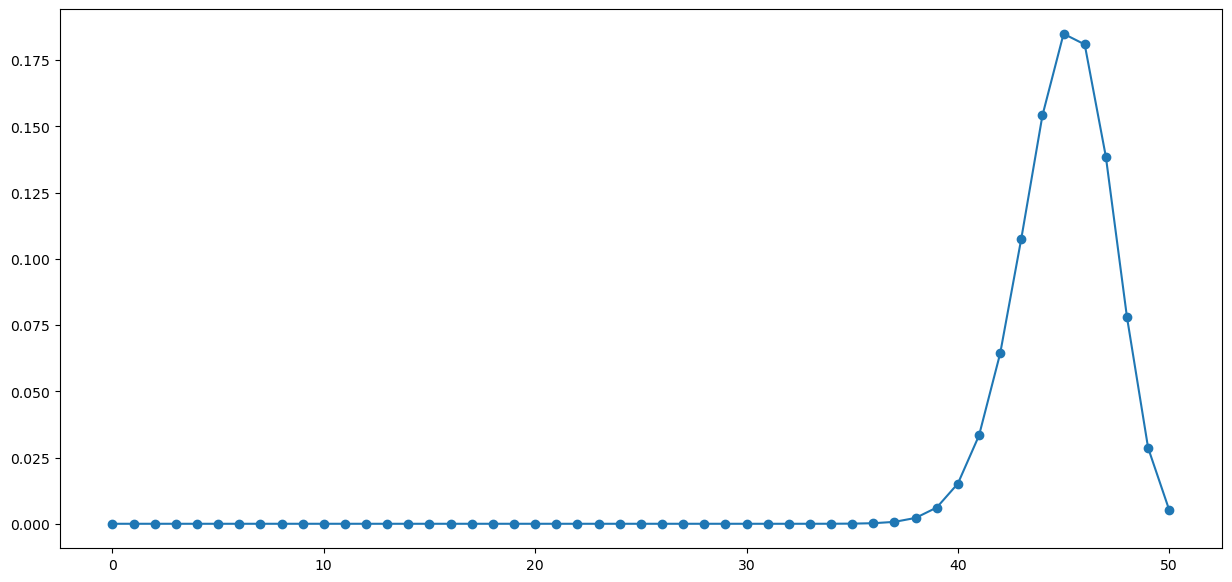

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.plot(x, y, marker='o')
plt.show()

# Continuous Random Variables and Probability Density Distributions

# 1. Normal distribution

- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm
- We need to specify two parameters for normal distributions : $\mu$ and $\sigma$
- scipy.stats.norm is by default given by "standard" normal distribution, which means $\mu=0$ and $\sigma=1$.
- If you want to use "non-standard" normal distributions, we need to specify loc ($\mu$) and scale ($\sigma$).

In [50]:
from scipy.stats import norm

In [51]:
mean, var, skew, kurt = norm.stats(moments='mvsk')

In [52]:
print(mean, var, skew, kurt)

0.0 1.0 0.0 0.0


In [53]:
mean, var, skew, kurt = norm.stats(loc=3, scale=2, moments='mvsk')

In [54]:
print(mean, var, skew, kurt)

3.0 4.0 0.0 0.0


In [60]:
x = np.arange(-8, 8, 0.1)

In [61]:
rv1 = norm(loc=0,  scale=1.0)   # Standard 
rv2 = norm(loc=3,  scale=2.0)   # Non-standard : less sharper than standard
rv3 = norm(loc=-2, scale=0.5)   # Non-standard : sharper than standard

In [62]:
y1 = rv1.pdf(x) # pdf = probability density function
y2 = rv2.pdf(x)
y3 = rv3.pdf(x)

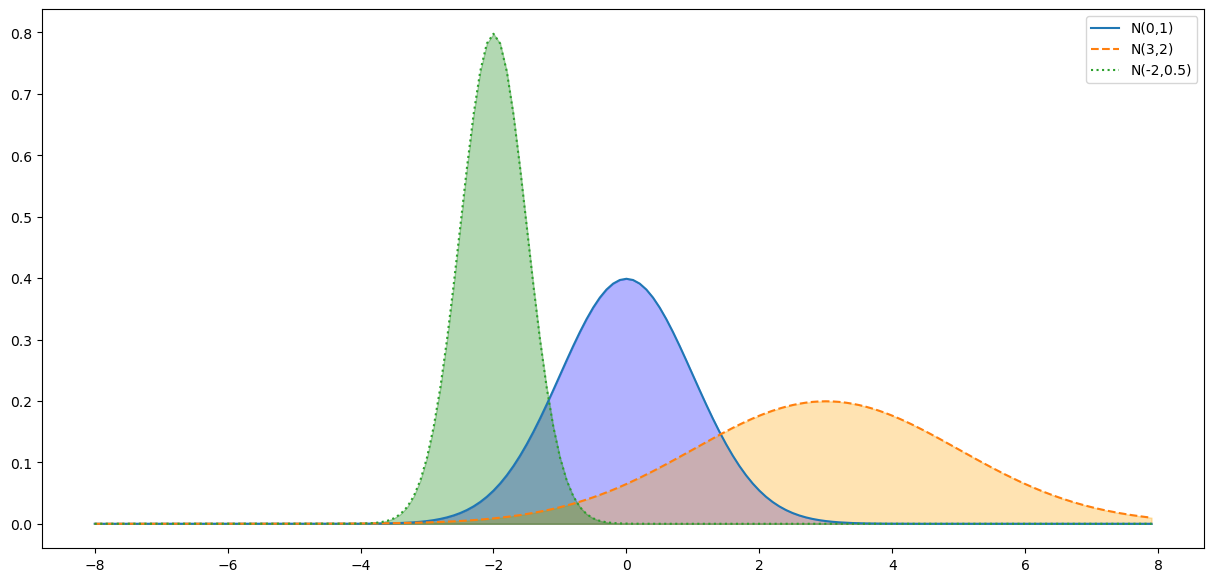

In [69]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.plot(x, y1, label="N(0,1)", linestyle='solid')
ax.plot(x, y2, label="N(3,2)", linestyle='dashed')
ax.plot(x, y3, label="N(-2,0.5)", linestyle='dotted')
ax.fill_between(x, y1, color="blue",   alpha=0.3)
ax.fill_between(x, y2, color="orange", alpha=0.3)
ax.fill_between(x, y3, color="green",  alpha=0.3)
ax.legend()
plt.show()

## Calculating Percentils or equivalently z-critical values

- Let us begin with non-standard normal distribution $N(3,0.5)$, which means $\mu=3$ and $sigma=0.5$.
- Somebody asks you to calculate 95 percentile of this normal distribution. 
- How can we calculate 95 percentile by using Python?
- Similarly we can calculate z critical value with $\alpha = 0.05$, $z_{0.05}$.

## 1) You can calculate percentiles directly by using given normal distribution.

In [70]:
rv = norm(loc=3, scale=0.5)

In [77]:
perct  = rv.ppf(0.95)
perct1 = rv.ppf(0.90)

In [72]:
print(perct)

3.822426813475736


In [73]:
x = np.arange(-5, 5, 0.01)
y = rv.pdf(x)

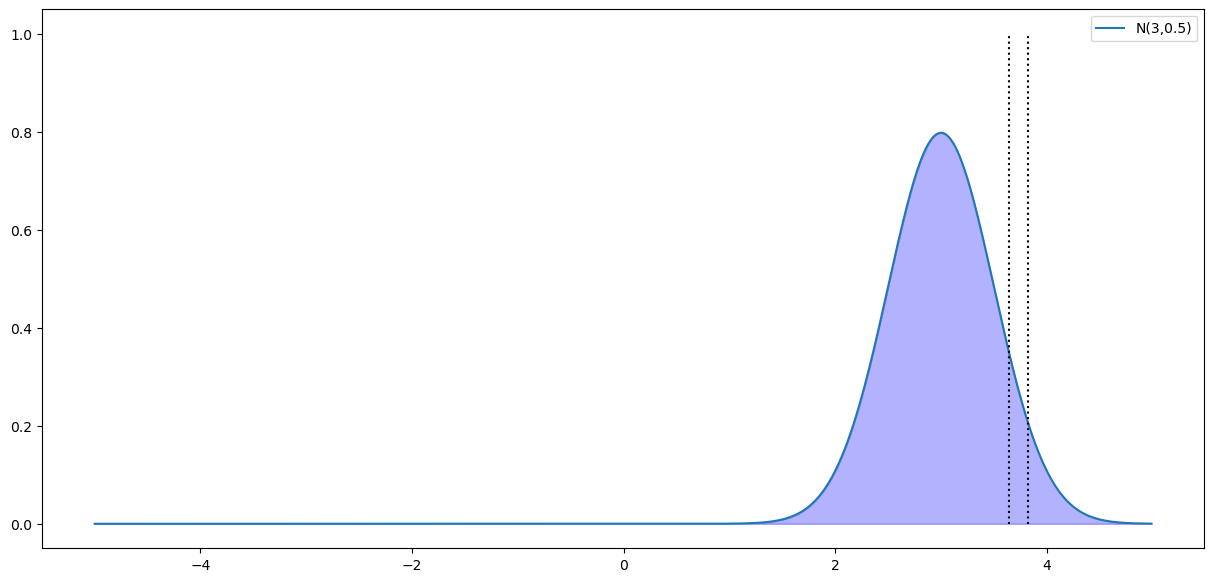

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.plot(x, y, label="N(3,0.5)", linestyle='solid')
ax.fill_between(x, y, color="blue",   alpha=0.3)
ax.plot([perct,perct],   [0,1], linestyle=":", color="black") # 95 percentile line
ax.plot([perct1,perct1], [0,1], linestyle=":", color="black") # 90 percentile line
ax.legend()
plt.show()

In [79]:
x1 = np.arange(0, perct, 0.01)
x2 = np.arange(perct, 5, 0.01)

In [80]:
y1 = rv.pdf(x1)
y2 = rv.pdf(x2)

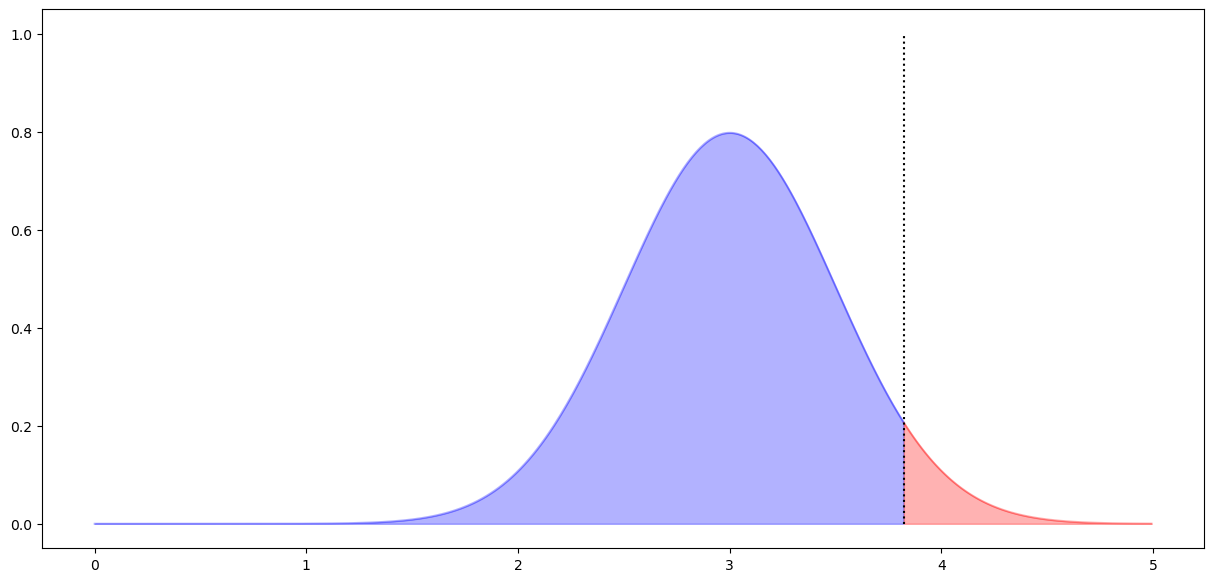

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,7))
ax.plot(x1, y1, color="blue", alpha=0.3)
ax.fill_between(x1, y1, color="blue",   alpha=0.3)
ax.plot(x2, y2, color="red", alpha=0.3)
ax.fill_between(x2, y2, color="red", alpha=0.3)
ax.plot([perct,perct],   [0,1], linestyle=":", color="black") # 95 percentile line
plt.show()

# 2) You can calculate percentiles by using standard normal distributions

- Transformation between given normal distribution and standard normal one
- You can use standard normal distribution tables or information

In [82]:
rv = norm(loc=0, scale=1) # Standard normal distrbition
perct = rv.ppf(0.95)
print(perct)

1.6448536269514722


- but this is NOT a 95 percentile of given normal distribution N(3,0.5)
- So we need to transform 95 percentile of standard normal distribution to that of given normal distribution.
- How to do? Using transformation between normal distributions as we learned in the lecture. 
- $z = \frac{x-\mu}{\sigma} \leftrightarrow x = \sigma\times z+\mu$ 

In [83]:
perct * 0.5 + 3

3.822426813475736

- We confirm that the calculation result based on standard normal distribution and transformation is exactly the same with the direct calculation. 